## Data Modeling and Machine Learning with the BaseballDatabank

The Baseball Databank, along with other relevant open baseball datasets, are described and linked to at the Chadwick Baseball Bureau, with the current version contained in the baseballdatabank git repository. The easiest way to get the data on your machine locally is to clone or download the repository. Once you have downloaded the data, you will find it contains two folders, 'core' and 'upstream'. The 'core' folder contains the databank itself, and 'upstream' contains files used to construct the databank.

First, some preliminary imports and configuration, which you can execute in the cell below.

In [1]:
import pandas as pd
import numpy as np
import glob, os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Reading in BaseballDatabank csv files

__[Link to section in Cornell Virtual Workshop introducing_this material](https://cvw.cac.cornell.edu/pydatasci1/reading_dataframes.aspx)__

First, let's examine the contents of the baseballdatabank/core directory using the %ls magic function in ipython/jupyter.

In [2]:
import os
os.listdir('/data/elastic-notebook/data/cvw/baseballdatabank/core')

['AllstarFull.csv',
 'Appearances.csv',
 'AwardsManagers.csv',
 'AwardsPlayers.csv',
 'AwardsShareManagers.csv',
 'AwardsSharePlayers.csv',
 'Batting.csv',
 'BattingPost.csv',
 'CollegePlaying.csv',
 'Fielding.csv',
 'FieldingOF.csv',
 'FieldingOFsplit.csv',
 'FieldingPost.csv',
 'HallOfFame.csv',
 'HomeGames.csv',
 'Managers.csv',
 'ManagersHalf.csv',
 'Parks.csv',
 'People.csv',
 'Pitching.csv',
 'PitchingPost.csv',
 'Salaries.csv',
 'Schools.csv',
 'SeriesPost.csv',
 'Teams.csv',
 'TeamsFranchises.csv',
 'TeamsHalf.csv',
 'readme2014.txt']

Now, let's define a function that will read all the baseballdatabank csv files into pandas dataframes.

In [3]:
def read_all_databank_core_csv(directory):
    """
    read all csv files in the specified baseball databank directory and
    populate a dictionary storing each of the tables keyed to its name
    """
    dfs = {}
    files = glob.glob('{}/*.csv'.format(directory))
    for f in files:
        d, name = os.path.split(f)
        table = os.path.splitext(name)[0]
        df = pd.read_csv(f)
        dfs[table] = df
    return dfs

bbdfs = read_all_databank_core_csv('/data/elastic-notebook/data/cvw/baseballdatabank/core')

# let's extract a few for further processing
batting = bbdfs['Batting']
pitching = bbdfs['Pitching']
teams = bbdfs['Teams']

## Descriptive statistics with pandas

__[Link to section in Cornell Virtual Workshop introducing_this material](https://cvw.cac.cornell.edu/pydatasci2/descriptive.aspx)__

The ```teams``` dataframe contains information about the performance of each team during a given year over the history of major league baseball.  Since the number of games played by each team during a season has changed over time, it is useful to augment the dataframe with a few more columns to normalize with respect to that variation in games played. We'll add two more columns, named ```RperG``` (runs per game) and ```WperG``` (wins per game), to get the average number of runs and wins per game, respectively. (In principle, this could be done for every entry in the team dataframe, but we will only consider these two statistics here.)  

In [4]:
teams['RperG'] = teams.R / teams.G
teams['WperG'] = teams.W / teams.G
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,RperG,WperG
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1,12.935484,0.645161
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1,10.785714,0.678571
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1,8.586207,0.344828
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1,7.210526,0.368421
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2,9.151515,0.484848


As noted, pandas provides numerous functions and methods for calculating various statistical summaries of a dataset.  Several of these are conveniently bundled up in a meta-summary, represented by the ```describe``` method on a dataframe.  This method computes means, standard deviations, minimum values, maximum values, and 25%/50%/75% quartile levels across all numerical columns in a dataframe, providing a quick summary of the data.  Note that the object returned by the describe method is itself a dataframe, with the summary names serving as the dataframe index (row labels).

In [5]:
teams.describe()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,BBA,SOA,E,DP,FP,attendance,BPF,PPF,RperG,WperG
count,2925.000000,2925.000000,2925.000000,2526.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,...,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2.646000e+03,2925.000000,2925.000000,2925.000000,2925.000000
mean,1957.599316,4.061538,150.808205,78.585511,75.004103,75.004103,684.623248,5158.655385,1348.460513,229.707009,...,475.982906,757.465641,183.241026,133.540513,0.965985,1.390692e+06,100.193162,100.214701,4.605009,0.495449
std,42.505220,2.303934,22.878728,4.617874,17.522547,17.267846,134.547497,738.885194,216.074082,58.699191,...,129.963105,315.919210,108.024341,35.169866,0.029253,9.604662e+05,4.924598,4.851388,0.977183,0.094105
min,1871.000000,1.000000,6.000000,44.000000,0.000000,4.000000,24.000000,211.000000,33.000000,1.000000,...,1.000000,0.000000,47.000000,0.000000,0.761000,6.088000e+03,60.000000,60.000000,2.058824,0.000000
25%,1921.000000,2.000000,154.000000,77.000000,66.000000,66.000000,615.000000,5146.000000,1303.000000,195.000000,...,431.000000,510.000000,114.000000,117.000000,0.966000,5.538080e+05,97.000000,97.000000,4.019231,0.438272
50%,1966.000000,4.000000,159.000000,81.000000,77.000000,76.000000,692.000000,5408.000000,1393.000000,234.000000,...,496.000000,762.000000,143.000000,141.000000,0.977000,1.200656e+06,100.000000,100.000000,4.469136,0.500000
75%,1995.000000,6.000000,162.000000,81.000000,87.000000,87.000000,765.000000,5522.000000,1466.000000,272.000000,...,554.000000,992.000000,210.000000,157.000000,0.981000,2.081326e+06,103.000000,103.000000,4.963190,0.560510
max,2019.000000,13.000000,165.000000,84.000000,116.000000,134.000000,1220.000000,5781.000000,1783.000000,376.000000,...,827.000000,1687.000000,639.000000,217.000000,0.991000,4.483350e+06,129.000000,141.000000,13.428571,0.865854


If we want to look at just a subset of the data columns, we can restrict our focus:

In [6]:
teams[['G', 'R', 'W', 'RperG', 'WperG']].describe()

,G,R,W,RperG,WperG
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,150.808205,684.623248,75.004103,4.605009,0.495449
std,22.878728,134.547497,17.522547,0.977183,0.094105
min,6.000000,24.000000,0.000000,2.058824,0.000000
25%,154.000000,615.000000,66.000000,4.019231,0.438272
50%,159.000000,692.000000,77.000000,4.469136,0.500000
75%,162.000000,765.000000,87.000000,4.963190,0.560510
max,165.000000,1220.000000,116.000000,13.428571,0.865854


We see that the runs per game (RperG) has a mean of approximately 4.61 and a standard deviation of approximately 0.98.  We can visualize this by plotting a histogram of the RperG data, as below.

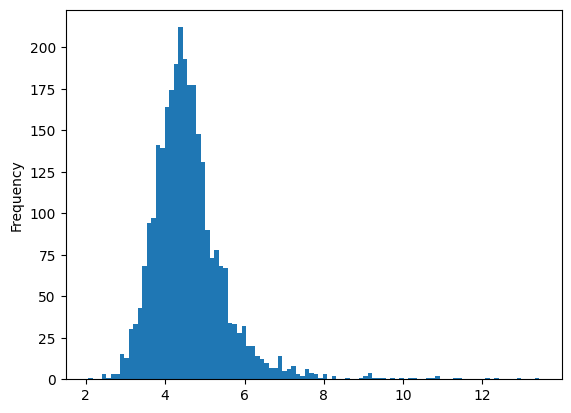

In [7]:
teams['RperG'].plot.hist(bins=100);
plt.savefig('teams_RperG_hist.png')

By default, the summary statistics computed are for all the data in the dataframe.  Sometimes it is useful to break up the data into subsets before computing data summaries.  In Part 1 of this tutorial, we introduced <a href="/pydatasci1/groupby">groupby operations</a> to split a dataframe into subsets before applying an aggregration function to each group.  We previously considered the situation where we grouped data according to a shared categorical label (such as a playerID, for the case of baseball players).  But pandas also provides very useful tools for splitting a dataset into groups by binning of numerical data, similar to how data are grouped into bins when one plots a histogram, as above.

The pandas function ```pd.cut``` cuts a dataframe or series by grouping a particular column into equally spaced bins, as is done with a histogram.  The function ```pd.qcut``` cuts a dataframe or series into bins of variable size such that each bin contains (approximately) the same number of entries.  The ```qcut``` function takes a parameter ```q``` that indicates how many bins to cut into, so ```q=4``` would split the data into quartiles, ```q=5``` into quintiles, etc.

Strictly speaking, what ```cut``` and ```qcut``` both do is introduce a new data label for each row indicating the numerical interval described by a bin.  In other words, it converts numerical values into categorical values, the latter being the bin intervals.  Once such categorization is performed, we can carryout the usual groupby operation, using the bin labels as the grouping criterion.  The code below divides up the teams RperG data (runs per game) into quartiles (q=4), then groups by the bins and computes the mean WperG (wins per game) for each quartile.  Perhaps not surprisingly, as the mean number of runs per game increases, so does the mean number of wins per game.

In [8]:
teams.groupby(pd.qcut(teams.RperG, q=4)).mean()['WperG']

RperG
(2.0580000000000003, 4.019]    0.437051
(4.019, 4.469]                 0.484611
(4.469, 4.963]                 0.510663
(4.963, 13.429]                0.549585
Name: WperG, dtype: float64

If you're still not certain about what ```pd.qcut``` is doing, execute the code cell below and examine the resulting output, comparing it with the index in the series returned by the groupby command above.

In [9]:
pd.qcut(teams.RperG, q=4)

0       (4.963, 13.429]
1       (4.963, 13.429]
2       (4.963, 13.429]
3       (4.963, 13.429]
4       (4.963, 13.429]
             ...       
2920     (4.469, 4.963]
2921     (4.469, 4.963]
2922    (4.963, 13.429]
2923     (4.469, 4.963]
2924    (4.963, 13.429]
Name: RperG, Length: 2925, dtype: category
Categories (4, interval[float64, right]): [(2.0580000000000003, 4.019] < (4.019, 4.469] < (4.469, 4.963] < (4.963, 13.429]]

## Regression with statsmodels

__[Link to section in Cornell Virtual Workshop introducing_this material](https://cvw.cac.cornell.edu/pydatasci2/statmodeling.aspx)__

Statsmodels is a package that provides support for the estimation of many different statistical models, conducting statistical tests, and statistical data exploration.  It provides functionality similar to that offered by other widely used statistical modeling environments, such as R, SAS, and Minitab.  Among other things, it provides a number of classes and functions for building linear regression models, generalized linear models, time series analysis, and state space models.  In this tutorial, we will just consider the simplest such applications, namely Ordinary Least Squares (OLS) linear regression.

Let's start by filtering our batting dataset a bit to consider only those statistics starting in the year 1900, which is the beginning of baseball's "modern" era.  Because the rules of the game changed a lot in the early years of baseball, and were mostly codified starting in 1900, this is a useful way to remove some of the systematic variation associated with those changes.  We saw in <a href="https://cvw.cac.cornell.edu/pydatasci1/history_baseball">Part 1 of this tutorial</a> that the history of hitting in baseball changed considerably after those early years.

We'll filter by date to capture the modern era, and drop any missing data since that will interfere with the statistical analyses that follow.  We'll call this new dataframe <code>batting00</code>, and then we will <a href="https://cvw.cac.cornell.edu/pydatasci1/augmenting">augment the dataset as we did in Part 1</a> in order to identify the number of one-base hits ('1B', or singles) that each player had.

In [10]:
batting00 = batting[batting.yearID >= 1900].dropna()

batting00['1B'] = batting00['H'] - (batting00['2B'] + batting00['3B'] + batting00['HR'])

We saw previously that there is some correlation between the number of strikeouts ('SO') a player has and the number of home runs ('HR') he hits.  Let's look at that relation visually with a scatterplot, which suggests an approximately linear relationship between the two variables, albeith with a lot of scatter.

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


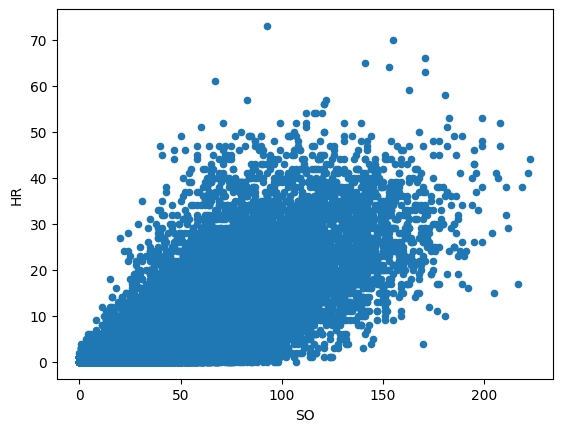

In [11]:
batting00.plot.scatter('SO', 'HR')
plt.savefig('/data/elastic-notebook/tmp/batting_SO_HR_scatter.png');

We would like to be able to quantify the approximately linear relationship, which we can do using statsmodels.  

In [12]:
import statsmodels.api as sm
X = batting00['SO']
y = batting00['HR']
X = sm.add_constant(X)

In [13]:
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     HR   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                 1.549e+05
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:45:35   Log-Likelihood:            -1.9872e+05
No. Observations:               70749   AIC:                         3.974e+05
Df Residuals:                   70747   BIC:                         3.975e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7372      0.018    -39.875      0.0

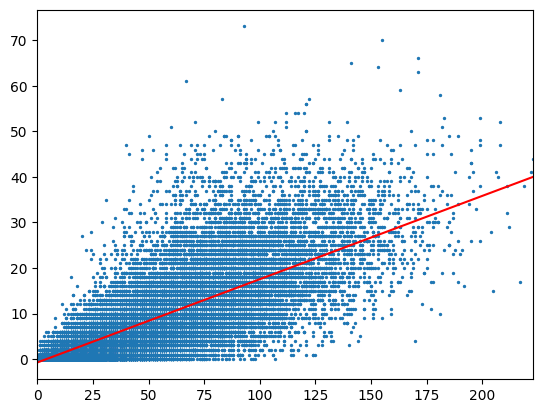

In [14]:
fig = sm.graphics.abline_plot(model_results=results, c='r')
ax = fig.axes[0]
ax.scatter(X['SO'], y, s=2)
plt.savefig('/data/elastic-notebook/tmp/batting_SO_HR_regression.png');

In [15]:
import statsmodels.api as sm
X = batting00[['SO', 'BB', '1B', '2B', '3B']]
y = batting00['HR']
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     HR   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                 4.540e+04
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:45:36   Log-Likelihood:            -1.8891e+05
No. Observations:               70749   AIC:                         3.778e+05
Df Residuals:                   70743   BIC:                         3.779e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6055      0.016    -37.212      0.0

## Sabermetrics: the "Pythagorean" theorem of baseball

__[Link to section in Cornell Virtual Workshop introducing_this material](https://cvw.cac.cornell.edu/pydatasci2/data_and_models.aspx)__

Baseball has long been a game of numbers and statistics, leading to the development over the past few decades of a number of novel and advanced statistical characterizations of individual and team performance, as well as a culture of sports analytics driving decision-making by professional teams and fan-engagement by those who follow the game.  "Sabermetrics" is a branch of advanced statistical modeling for baseball, named after the <a href="https://en.wikipedia.org/wiki/Society_for_American_Baseball_Research">Society for American Baseball Research</a> (SABR).  The term was coined by <a href="https://en.wikipedia.org/wiki/Bill_James">Bill James</a>, widely regarded as the founder of modern baseball analytics.

One novel statistic that James invented is the "Pythagorean winning percentage" or <a href="https://en.wikipedia.org/wiki/Pythagorean_expectation">"Pythagorean expectation"</a>, which are also sometimes referred to as the "Pythagorean theorem of baseball".  This statistic essentially encapsulates a model that aims to predict how many games a baseball team will win just based on the number of runs they score and the number of runs they allow.  In order to win a game, a team must score more runs than it allows, but how those quantities pile up over the course of many games is the subject of James' inquiry.

As noted, the model aims to predict a team's expected win ratio (wins W / total games played G) based on the number of runs it scores (R) and the number of runs it allows (RA).  As formulated by James,

$W/G = \frac{R^2}{R^2 + RA^2} = \frac{1}{1 + (RA/R)^2}$

The fact the formula involves a sum of squares is suggestive of the theorem describing the relationship among the lengths of the sides of a right triangle, formulated by Pythagoras (and hence the name).

We can examine this relationship in the data by <a href="https://cvw.cac.cornell.edu/PyDataSci1/augmenting">augmenting</a> the <code>teams</code> dataframe with some additional columns.  We'll start by filtering the teams dataframe only going back to the year 1900, which is the beginning of baseball's "modern" era -- we'll call this dataframe <code>teams00</code>.  In the dataframe, the columns 'W', 'G', 'R', and 'RA' refer to wins, games played, runs scored, and runs allowed, respectively.  Then we can augment the dataframe with additional information about win ratio ('W/G') and run ratio ('RA/R').

Let's first make a plot of W/G versus RA/R, over all teams and all years.  The decrease seen makes sense: a team is less likely to win as it allows more and more runs relative to how many it scores.

In [16]:
teams00 = teams[teams.yearID >= 1900].copy()
teams00.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,RperG,WperG
375,1900,NL,BRO,LAD,NaN,1,141,NaN,82,54,...,Brooklyn Superbas,Washington Park III,183000.0,106,104,BRO,BRO,BRO,5.787234,0.581560
376,1900,NL,BSN,ATL,NaN,4,142,NaN,66,72,...,Boston Beaneaters,South End Grounds III,202000.0,112,111,BSN,BSN,BSN,5.478873,0.464789
377,1900,NL,CHN,CHC,NaN,6,146,NaN,65,75,...,Chicago Orphans,West Side Park II,248577.0,96,98,CHC,CHN,CHN,4.349315,0.445205
378,1900,NL,CIN,CIN,NaN,7,144,NaN,62,77,...,Cincinnati Reds,League Park II in Cincinnati,170000.0,98,99,CIN,CIN,CIN,4.881944,0.430556
379,1900,NL,NY1,SFG,NaN,8,141,NaN,60,78,...,New York Giants,Polo Grounds III,190000.0,95,98,NYG,NY1,NY1,5.056738,0.425532


/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


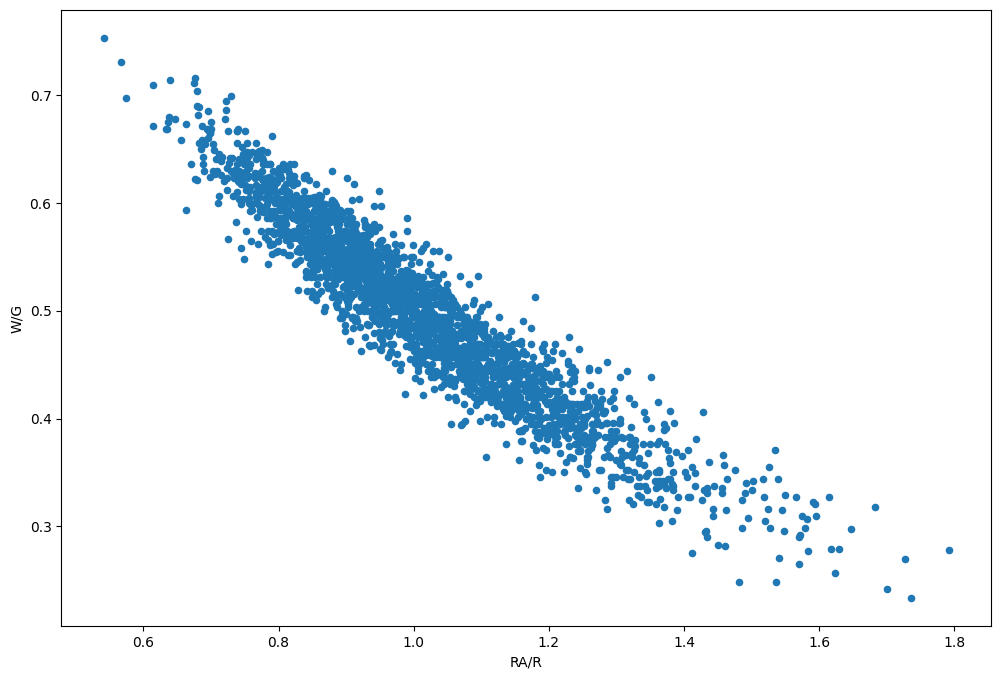

In [17]:
teams00['W/G'] = teams00.W/teams00.G
teams00['RA/R'] = teams00.RA / teams00.R
teams00.plot.scatter('RA/R', 'W/G', figsize=(12,8))
plt.xlabel('RA/R');
plt.ylabel('W/G');
plt.savefig('/data/elastic-notebook/tmp/teams00_WG_RAR_scatter.png');

As noted, even though the data relationship was originally forumulated with an exponent of 2, we can generalize the model to allow for any exponent.  In doing so, we can fit this generalized model of the data to identify the value of the exponent that best fits the data.  The SciPy package, and in particular, the module <code>scipy.optimize</code>, provides a number of functions for carrying out these sorts of optimizations and data fits.  We will use the function <code>curve_fit</code> to extract the best-fitting value of the Pythagorean exponent, by first defining a function (named <code>pythag</code>) that we want to optimize, and then passing that function along with the data to <code>curve_fit</code>.

In [18]:
from scipy.optimize import curve_fit

def pythag(x, exponent):
    return 1 / (1 + x**exponent)

xdata = teams00.RA/teams00.R
ydata = teams00['W/G']

popt, pcov = curve_fit(pythag, xdata, ydata, [2.0])
print(popt)

[1.84050647]


We can then plot the data against both the "pythagorean" version of the model (with exponent 2) and the "best fit" version of the model using the optimal parameter <code>popt</code> that we extracted using SciPy.

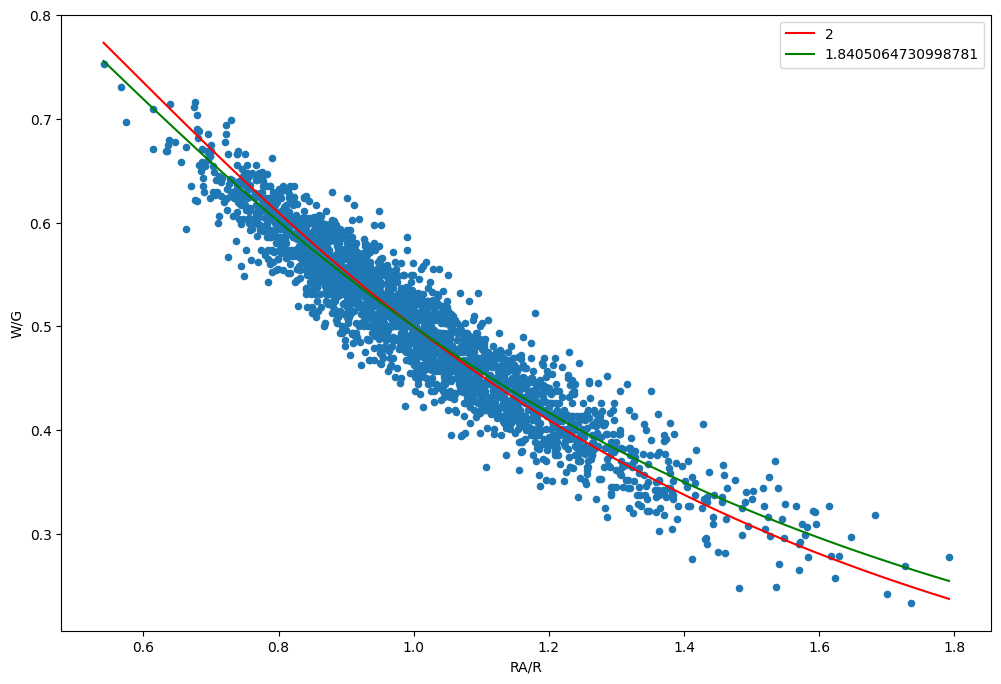

In [19]:
xs = np.linspace(teams00['RA/R'].min(), teams00['RA/R'].max(), 100)
expected_wins_2 = pythag(xs, exponent=2)
expected_wins_popt = pythag(xs, exponent=popt[0])

teams00.plot.scatter('RA/R', 'W/G', figsize=(12,8))
plt.plot(xs, expected_wins_2, color='r', label='2')
plt.plot(xs, expected_wins_popt, color='g', label=str(popt[0]))
plt.legend();
plt.savefig('/data/elastic-notebook/tmp/pythagorean_curve_fit.png');

We found an optimal exponent of approximately 1.84, whereas Baseball Reference quotes a best fit of 1.83, although their analysis is not obviously documented anywhere.  In addition to tweaking the exponent to find the best fit of a "pythagorean-type" model to the data, several writers have introduced other model variants to get better predictors of a team's performance.  

If this all seems a little opaque, part of the reason the Pythagorean formulas have the nonlinear forms they do is that the ratio of runs allowed to runs scored (RA/R) is not really the best variable for characterizing these relationships.  Ben Vollmayr-Lee has an <a href="https://www.eg.bucknell.edu/~bvollmay/baseball/pythagoras.html">excellent post</a> that demystifies these various models and provides a systematic way of thinking about the relationship among different model variants.

By changing variables as Vollmayr-Lee suggests and reproducing (more or less) one of his plots, we can see that the data basically represent a linear relationship between fraction of games won (W/(W+L)) and fraction of runs scored (R/(R+RA)), centered about the point (1/2, 1/2).  A nonlinear pythagorean model basically helps to fit the tails of the dataset a little better to address the fact there are diminishing returns in the data: after some point, scoring lots of runs (or giving up lots of runs) has less impact on the overall win ratio.

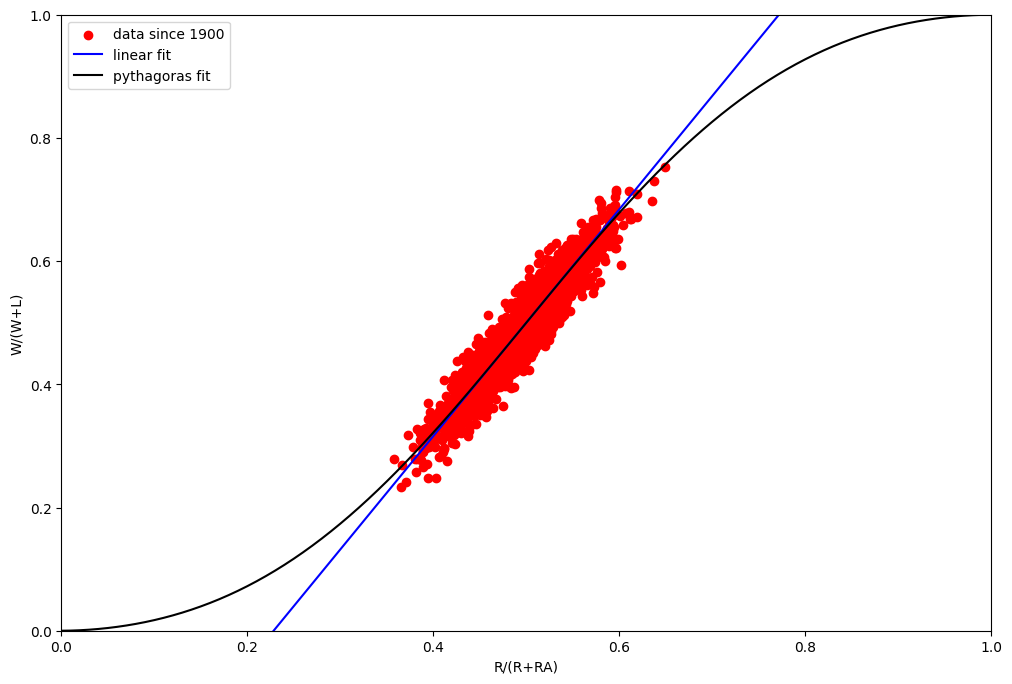

In [20]:
def linear_fit(x, n):
    return 0.5 + n * (x-0.5)

def pythagoras_fit(x, n):
    return (x**n)/( (x**n) + (1-x)**n )

xs = np.arange(0.,1.,0.01)
plt.figure(figsize=(12,8))
plt.scatter(teams00['R']/(teams00['R']+teams00['RA']), teams00['W/G'], color='r', label='data since 1900')
plt.plot(xs, linear_fit(xs, popt[0]), 'b', label='linear fit')
plt.plot(xs, pythagoras_fit(xs, popt[0]), 'k', label='pythagoras fit')
plt.xlabel('R/(R+RA)');
plt.ylabel('W/(W+L)');
plt.xlim(0,1);
plt.ylim(0,1);
plt.legend();
plt.savefig('/data/elastic-notebook/tmp/pythagorean_VollmayrLee.png');

## Overachievers and Underachievers

With the combined data on expected win ratio and actual win ratio, we can endeavor to determine whether particular teams are overachievers or underachievers, that is, whether they actually win more games than we would expect them to based on the number of runs scored and runs allowed, or win fewer.  The code below makes a summary plot of actual vs. expected win ratio, but feel free to dig into the data further if you're interested in what teams over- and under-achieve.

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


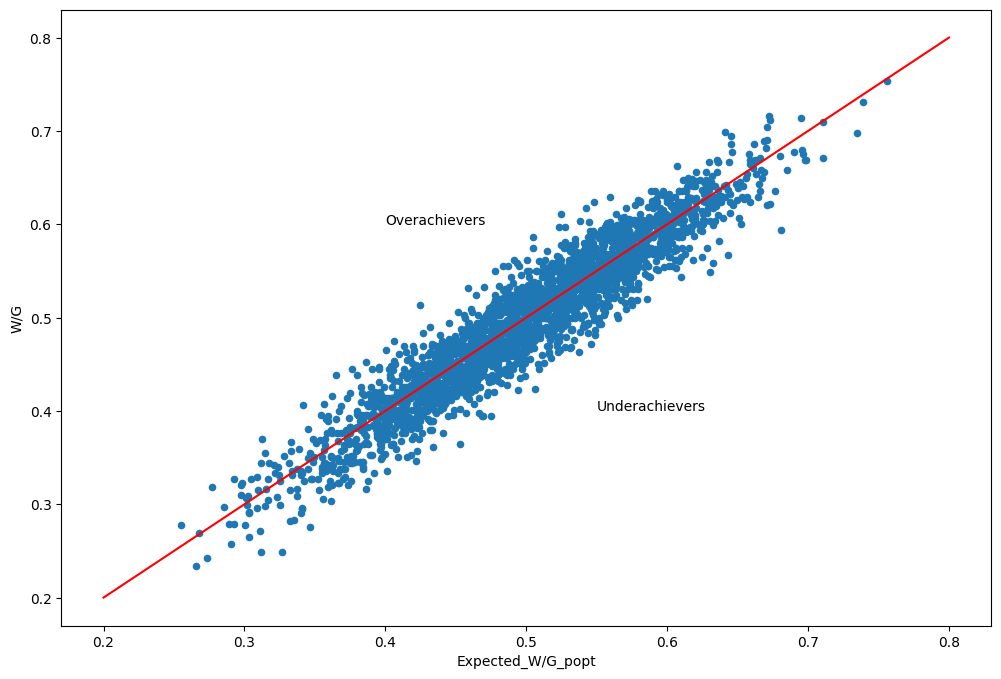

In [21]:
teams00['Expected_W/G_popt'] = 1 / (1 + (teams00.RA/teams00.R)**popt[0])
teams00['Overachieving'] = teams00['W/G'] - teams00['Expected_W/G_popt']
teams00.plot.scatter('Expected_W/G_popt', 'W/G', figsize=(12,8))
plt.plot([0.2,0.8],[0.2,0.8], color='r');
plt.text(0.4, 0.6, 'Overachievers');
plt.text(0.55, 0.4, 'Underachievers');

In [22]:
top = teams00.loc[teams00['Overachieving'].idxmax()]
print(top.yearID, top.teamID)
bottom = teams00.loc[teams00['Overachieving'].idxmin()]
print(bottom.yearID, bottom.teamID)

1905 DET
1993 NYN


## Co-player network in baseball

__[Link to section in Cornell Virtual Workshop introducing_this material](https://cvw.cac.cornell.edu/pydatasci2/networks.aspx)__

Networks encoding collaborative relationships among people have received considerable attention.  The co-actor network &mdash; which connects any two actors if they were ever in a movie together &mdash; is the basis for the popular  <a href="https://oracleofbacon.org">Kevin Bacon game</a>, which identifies how many hops any actor is from Kevin Bacon.  Similarly, <a href="http://www-personal.umich.edu/~mejn/papers/cnlspre.pdf">co-authorship networks</a> &mdash; where any two researchers are connected if they have co-authored a paper together &mdash; have been analyzed to understand the structure of scientific communities and the evolution of new fields of inquiry.  With the Baseball Databank data, we can construct a similar sort of co-player network, which connects any two players if they 
were members of the same team during the same season.  (Strictly speaking, this will slightly overestimate the number of true co-players, since two people could have been members of the same team during the same season, but not have actually been on the roster at the same time during the season or played together in a game.  More fine-grained data, such as the gamelog data in Retrosheet (retrosheet.org), would be needed to resolve those sorts of associations.)

The basic information needed to construct this network is in the <code>Appearances</code> dataframe.

In [23]:
appearances = bbdfs['Appearances']
appearances.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,TRO,NaN,abercda01,1,1.0,1,1.0,0,0,...,0,0,1,0,0,0,0,0.0,0.0,0.0
1,1871,RC1,NaN,addybo01,25,25.0,25,25.0,0,0,...,22,0,3,0,0,0,0,0.0,0.0,0.0
2,1871,CL1,NaN,allisar01,29,29.0,29,29.0,0,0,...,2,0,0,0,29,0,29,0.0,0.0,0.0
3,1871,WS3,NaN,allisdo01,27,27.0,27,27.0,0,27,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,1871,RC1,NaN,ansonca01,25,25.0,25,25.0,0,5,...,2,20,0,1,0,0,1,0.0,0.0,0.0


Each row contains information about a player (playerID) who played for a particular team (teamID) during a particular season (yearID).  We can use the powerful <code>groupby</code> functionality in pandas to get the playerIDs of all players who were part of a given team during a given season.  We can chain several methods together in one long statement, to group by year and team, select the playerIDs, identify the number of unique players for each (year, team) combination, and then reset the index to put the year and team back as columns in the new dataframe (dfyt).

In [24]:
dfyt = appearances.groupby(['yearID', 'teamID'])['playerID'].\
    apply(np.unique).reset_index()
dfyt.head()

,yearID,teamID,playerID
0,1871,BS1,"[barnero01, barrofr01, birdsda01, conefr01, go..."
1,1871,CH1,"[brannmi01, duffyed01, foleyto01, hodesch01, k..."
2,1871,CL1,"[allisar01, bassjo01, battijo01, carleji01, ew..."
3,1871,FW1,"[armstbo01, barrebi01, biermch01, careyto01, d..."
4,1871,NY2,"[eggleda01, fergubo01, fleetfr01, hatfijo01, h..."


There are a couple different ways of encoding a co-player (or co-actor or co-author) network.  One approach would be to have nodes that are players, with an edge between any two if they were on the same team in the same year.  While conceptually straightforward, this is computationally rather inefficient, since for N players on a team during a given season, there will be N(N-1)/2 edges, such that that group forms a clique in the network.  Another approach is to construct a <i>bipartite network</i>, with some nodes representing players and other nodes representing (year, team) pairs, such that a player node is connected to a (year, team) node if the player played on the (year, team).  This then replaces the N(N-1)/2 player-to-player edges with only N player-to-(year, team) edges, and also has the advantage of preserving the information about what (year, team) different players are connected through, which will be useful below.

The code below defines a function that makes a coplayer network based on the information in the appearances dataframe.  It first does the pandas groupby operation described above, initializes an empty Networkx graph, and then iterates over the rows of the resulting dataframe (dfyt), adding graph edges between connected players and (year, team) identifiers.  The power and flexibility of the Python language &mdash; and by extension, the NetworkX library &mdash; is evident here in how we can define node IDs in this network.

In [25]:
import networkx as nx

def make_coplayer_network(appearances):
    dfyt = appearances.groupby(['yearID', 'teamID'])['playerID'].\
        apply(np.unique).reset_index()
    g = nx.Graph()
    for idx, entry in dfyt.iterrows():
        yearID, teamID, playerIDs = entry
        for pid in playerIDs:
            g.add_edge((yearID, teamID), pid)
    return g

coplayer = make_coplayer_network(bbdfs['Appearances'])

Once we have the data in a NetworkX graph, we can examine all sorts of things.  For example, we can ask how many nodes and edges this graph has.

In [26]:
coplayer.number_of_nodes(), coplayer.number_of_edges()

(22615, 107357)

We can ask how many connected components the graph has &mdash; it turns out the answer is 1.  This means that all players are connected to each other through some number of hops on the network.  This is perhaps not too surprising: in the current era of free agency, there is a massive amount of player movement from team to team, but even in the earlier days before free agency (where players were bound to teams and their movement restricted), there was apparently enough movement through trades to connect up everyone.

In [27]:
nx.number_connected_components(coplayer)

1

#### Shortest paths

Somewhat like in the Kevin Bacon game, we can investigate the number of hops on the network required to connect any two players (although because we are including year-teams as nodes in the network, we need to adjust our counting to include only hops through the subgraph of players).  For example, we can identify the shortest path (or one of possibly multiple co-shortest paths) between Ichiro Suzuki (suzukic01) and George Sisler (sislege01), the top two single-season hit leaders in MLB history:

In [28]:
nx.shortest_path(coplayer, 'suzukic01', 'sislege01')

['suzukic01',
 (2001, 'SEA'),
 'javiest01',
 (1984, 'NYA'),
 'niekrph01',
 (1964, 'ML1'),
 'spahnwa01',
 (1942, 'BSN'),
 'coonejo01',
 (1928, 'BSN'),
 'sislege01']

The playerIDs are a bit obscure (although well-versed baseball fans might recognize some if not all of the players on the path), but we can make things a little more user-friendly if we write a little more code to extract the players' names from the People.csv dataframe:

In [29]:
def get_player_name(pid, people):
    try:
        return people[people.playerID==pid][['nameFirst', 'nameLast']].\
            apply(lambda x: ' '.join(x), axis=1).iloc[0]
    except:
        return None

def get_shortest_coplayer_path(coplayer, people, node1, node2):
    spath = nx.shortest_path(coplayer, node1, node2)
    spathn = []
    for elem in spath:
        pname = get_player_name(elem, people)
        if pname is not None:
            spathn.append(pname)
        else:
            spathn.append(elem)
    return spathn


In [30]:
people = bbdfs['People']

get_shortest_coplayer_path(coplayer, people, 'suzukic01', 'sislege01')

['Ichiro Suzuki',
 (2001, 'SEA'),
 'Stan Javier',
 (1984, 'NYA'),
 'Phil Niekro',
 (1964, 'ML1'),
 'Warren Spahn',
 (1942, 'BSN'),
 'Johnny Cooney',
 (1928, 'BSN'),
 'George Sisler']

So we can see that Ichiro Suzuki played on the 2001 Seattle Mariners with Stan Javier, who played on the 1984 New York Yankees with Phil Niekro, who played on the 1964 Milwaukee Braves with Warren Spahn, who played on the 1942 Boston Braves with Johnny Cooney, who played on the 1928 Boston Braves with George Sisler.

We can do some other queries, e.g., to connect Hank Aaron to the one player who precedes him alphabetically in the People database:

In [31]:
get_shortest_coplayer_path(coplayer, people, 'aaronha01', 'aardsda01')

['Hank Aaron',
 (1975, 'ML4'),
 'Charlie Moore',
 (1986, 'ML4'),
 'Mike Birkbeck',
 (1995, 'NYN'),
 'Edgardo Alfonzo',
 (2004, 'SFN'),
 'David Aardsma']

Because the year-team pairs are also nodes in the graph, we can inquire about shortest paths connecting different year-teams, such as the path the connects the World Series Champion 2016 Chicago Cubs with the last previous Cubs team to win a World Series, in 1908.  Interestingly, we find the same subpath from Phil Niekro to Warren Spahn to Johnny Cooney in this search too.  These players &mdash; all of whom played into their 40's &mdash; might be an important conduit for connecting players and teams across the decades.  In graph theory parlance, those edges might have a high edge betweenness, indicating that those edges (or nodes) lie on a large fraction of shortest paths connecting all pairs on nodes in the network.

In [32]:
get_shortest_coplayer_path(coplayer, people, (2016, 'CHN'), (1908, 'CHN'))

[(2016, 'CHN'),
 'Jon Lester',
 (2006, 'BOS'),
 'David Wells',
 (1987, 'TOR'),
 'Phil Niekro',
 (1964, 'ML1'),
 'Warren Spahn',
 (1942, 'BSN'),
 'Johnny Cooney',
 (1929, 'BSN'),
 'Johnny Evers',
 (1908, 'CHN')]

## Clustering

Clustering represents a set of methods in unsupervised machine learning that aims to group data elements into subsets based on a shared similarity.  As such, a clustering method must define what it means for two data elements to be "similar".  k-means clustering is a widely used clustering algorithm that divides a dataset into k different subsets (for specified integer k), based upon a euclidean distance metric between two points in the data space (such that two data points that are identical are separated by distance 0 and are maximally similar to each other).  k-means clustering defines a set of centroids or centers in the data space (one center for each cluster), such that every data point within the cluster is closer to its own center than to some other cluster's center.  k-means clustering is discussed in the scikit-learn documentation, along with many other clustering algorithms.

In this case, we're interested in clustering the baseball batting data, to find players who had similar batting statistics over their careers.  There is no one correct way to make such a comparison, especially since players had careers that lasted for differing lengths, and one might hope to correct for at least some of that bias.  In the code below, we normalize each player's career batting totals by their total number of at-bats, so that each hitting statistic represents a rate per at-bat (per_ab).  In the code cell below, we first do some data processing to prepare a new dataframe named <code>pl_bat_per_ab</code>.  With this dataframe, each player's career batting statistics are summarized by 15 features, or as a point in a 15-dimensional space.  We want to cluster players based upon similarity of these feature vectors.

In [33]:
batting = bbdfs['Batting']
pl_bat = batting.groupby('playerID').sum().reset_index()

pl_bat_with_ab = pl_bat[pl_bat.AB>0]

pl_bat_per_ab = pl_bat_with_ab[['R', 'H', '2B', '3B', 'HR','RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']].div(pl_bat_with_ab.AB, axis=0)
pl_bat_per_ab['playerID'] = pl_bat['playerID']
pl_bat_per_ab.set_index('playerID', inplace=True)

Scikit-learn provides a class for carrying out k-means clustering in <code>sklearn.cluster.KMeans</code>.  Because different components of the feature vector can have different characteristic scales, it is sometimes useful to preprocess the data to make such variation consistent across components.  The <code>StandardScaler</code> object provided by sklearn can be used to scale the raw data such that each column has zero mean and unit variance.

After preprocessing, we can carry out k-means clustering with a specified number of clusters k.  In this example, we arbitrarily choose k=10, but one typically wants to carry out such clustering for different k and assess the results.  After clustering, various aspects of the clustering can be examined, such as which data points are grouped together, and what the cluster centers look like.  It should be noted that the act of clustering assigns cluster labels to each data point, but the numerical value of those labels is arbitrary, and will change from run to run since k-means has some stochastic elements in it.  What is more meaningful is which data points get clustered together (regardless of the specific label).

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

X = pl_bat_per_ab.values
scaler = StandardScaler().fit(X)
Xsc = scaler.fit_transform(X)

k = 10
kcluster = KMeans(n_clusters=k)
kcluster.fit(Xsc)

labels = list(kcluster.labels_)

The Baseball Databank also contains information about who has been inducted into the Baseball Hall of Fame (HOF).  While the Hall of Fame includes inductees such as managers and umpires who might have undistinguished or nonexistent major league baseball playing careers, most of the members are inducted due to their superior playing performance.  So it might be interesting to see whether the clustering of hitting statistics above reflects at all the superior play characteristic of HOF players.  The code cells below compute the number of HOF members in each of our k=10 clusters, identifies which clusters have the most HOF players, and then plots the cluster centers for the 3 clusters that contain almost all of the HOF players.

It is worth noting here (and this issue will be revisited later) that there are fundamentally two different types of players in baseball: Pitchers and Position Players (the latter of which we might refer to below simply as "Players").  Pitchers play a specialized role in the game of baseball (something like the way that goalies are differentiated in sports that involve a goalie), and it is their pitching skills that are valued rather than their hitting skills.  So we would generally expect that pitchers (even HOF pitchers) might stand out as a separate subset of players when we examine only their batting/hitting statistics.

In [35]:
HOF = bbdfs['HallOfFame']
inHOF = set(HOF[HOF.inducted=='Y'].playerID)

idx = 0
labelsHOF = {n:0 for n in range(k)}
for playerID, row in pl_bat_per_ab.iterrows():
    if playerID in inHOF:
        label = labels[idx]
        labelsHOF[label] += 1
    idx += 1

In [36]:
mostHOF = sorted(labelsHOF.items(), key=lambda x: x[1], reverse=True)
print(mostHOF)

[(7, 132), (2, 73), (0, 49), (6, 3), (1, 0), (3, 0), (4, 0), (5, 0), (8, 0), (9, 0)]


In the figure below, we plot the three cluster centers most associated with HOF players.  For those clusters, you should probably be able to see that one cluster emphasizes players who are able to hit homeruns (HR), another cluster involves players who get a lot of hits (H) but not so many HR, and a third cluster involves players who hit less well and have lots of strike outs (SO).  These first two clusters mostly reflect Position Players with different batting characteristics, while the third mostly reflects Pitchers who do not hit well but possess other skills.

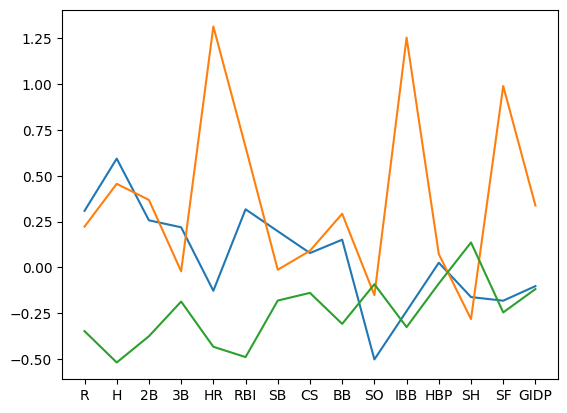

In [37]:
for i in range(3):
    plt.plot(kcluster.cluster_centers_[mostHOF[i][0]])
plt.xticks(range(len(pl_bat_per_ab.columns)), pl_bat_per_ab.columns);
plt.savefig('/data/elastic-notebook/tmp/kmeans_clusters_3.png');

## Dimensionality reduction

Dimensionality reduction is another set of techniques in unsupervised learning where approximate representations of datasets are developed involving fewer independent degrees-of-freedom (so that the dimensionality of the dataset is reduced in the approximation).  Broadly speaking, dimensionality reduction methods appear in many different situations and in conjunction with many different methods.  If one has time-series data, for example, one might choose to compute a fourier transform of the data to convert it to the frequency domain: often one just wants to work with that full complement of frequency data, but sometimes one can pull out a few dominant frequency modes that capture most of the variation in the original signal, and those few modes can be used to develop an approximate representation of the signal that is much smaller and of lower dimension.

Various dimensionality reduction methods have been developed to support these sorts of data reductions and approximate representations.  Whether or not there is an effective low-dimensional representation depends on the data, but it is often the case that "big data are not as big as they seem", in that datasets embedded in some high-dimensional data space actually lie along or within some lower-dimensional manifold contained in that space.  Thus dimensionality reduction often has contained within in a process of "manifold learning", that is, inferring (learning) what low-dimensional manifold describes the geometry of a dataset.

The most widely used dimensionality reduction method is probably Principal Components Analysis (PCA).  At its root, PCA attempts to model a cloud of data points in some data space as an ellipsoid, and to identify the principal axes of that ellipsoid as the source of a low-dimensional description.  These principal axes are the (orthogonal) directions of maximum variation in the dataset: the first principal component corresponds to the longest dimension of the data clouds, etc.  PCA works well if your data is in the shape of an ellipsoidal cloud, but works less well if it has some other shape, even if that shape involves locally a lower-dimensional structure, such as the classic "swiss roll" structure (a 2D manifold embedded in 3D), or a piece of spaghetti twirled up on itself (a 1D manifold embedded in 3D).  <a href="https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction">Nonlinear dimensionality reduction methods</a> aim to extract these sorts of manifolds, and we will consider one such method here: T-distributed Stochastic Neighbor Embedding, or TSNE (pronounced "tee-snee").

TSNE is often used to reduce a dataset from some large number of dimensions down to a few dimensions (usually 2, sometimes 3) to allow for data visualization.  Like many nonlinear methods, it aims to preserve local structure in a dataset by placing similar data points nearby each other (as "neighbors"), even if any projection from many dimensions down to 2 will invariably involve some distortion (such as we see in 2D maps of the surface of the earth).  TSNE is supported by scikit-learn, and <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html">documented here</a>.  We will use this method to visualize the batting data we considered above in the context of clustering (pl_bat_per_ab), in order to generate a global map of the batting characteristics of every MLB player.  We will visualize that map using the interactive Bokeh tools we have examined previously in order to provide a platform for users to explore that map in detail.

In the code cell below, we import the TSNE object from <code>sklearn.manifold</code>, which provides a variety of methods for manifold learning.  Then we write a small function to take an array of numerical data representing a set of feature vectors (in this case, the scaled batting data we constructed above, <code>Xsc</code>) as well as a set of labels for those data, which in our case will be the playerID that is associated with each feature vector.  We then run the TSNE analysis (this might take a few minutes to complete), and then clean up the resulting dataframe (which we call <code>dfe</code>, short for "dataframe embedding").

In [38]:
from sklearn.manifold import TSNE

def run_tsne(Xsc, index):
    X_e = TSNE(n_components=2).fit_transform(Xsc)
    dfe = pd.DataFrame(X_e, index=index)
    dfe.reset_index()
    return dfe

In [39]:
dfe = run_tsne(Xsc, pl_bat_per_ab.index)

In [40]:
dfe.reset_index(inplace=True)
dfe.rename(columns={0: 'X', 1:'Y'}, inplace=True)
dfe.head()

,playerID,X,Y
0,aardsda01,1.155971,57.086391
1,aaronha01,74.003952,-36.884926
2,aaronto01,36.739433,0.341815
3,aasedo01,-6.312378,70.495850
4,abadan01,-6.430958,-16.884819


Because we'll want to visualize the data alongside some other information, let's augment our new dataframe <code>dfe</code>.  Specifically, let's add a few columns describing whether or not a player is in the Hall of Fame (HOF), whether or not they were a Pitcher, and their name to make their identity more obvious.  We'll take a picture at  the dataframe once we're done.

In [41]:
# add HOF (Hall of Fame) column to dfe if person has been inducted in the HOF
dfe['HOF'] = dfe.playerID.apply(lambda x: x in inHOF)

# add Pitcher column to dfe if person is in pitching dataframe and has pitched in at least 10 games in their career
pl_pitch = pitching.groupby('playerID').sum()
dfe['Pitcher'] = dfe.playerID.apply(lambda x: x in pitching.playerID.values and pl_pitch.loc[x].G >= 10)

# add Name column by looking up their playerID in the people dataframe
people = bbdfs['People']
dfe['Name'] = dfe.playerID.apply(lambda x: get_player_name(x, people))

# let's have a peek
dfe.head()

,playerID,X,Y,HOF,Pitcher,Name
0,aardsda01,1.155971,57.086391,False,True,David Aardsma
1,aaronha01,74.003952,-36.884926,True,False,Hank Aaron
2,aaronto01,36.739433,0.341815,False,False,Tommie Aaron
3,aasedo01,-6.312378,70.495850,False,True,Don Aase
4,abadan01,-6.430958,-16.884819,False,False,Andy Abad


The embedding produces (X,Y) coordinates for each player.  We can use matplotlib to make a scatterplot of that two-dimensional representation.  Because TSNE is stochastic, the actual layout and appearance in this 2D space will change from run to run, but local structures and relationships ought to be robust across runs.

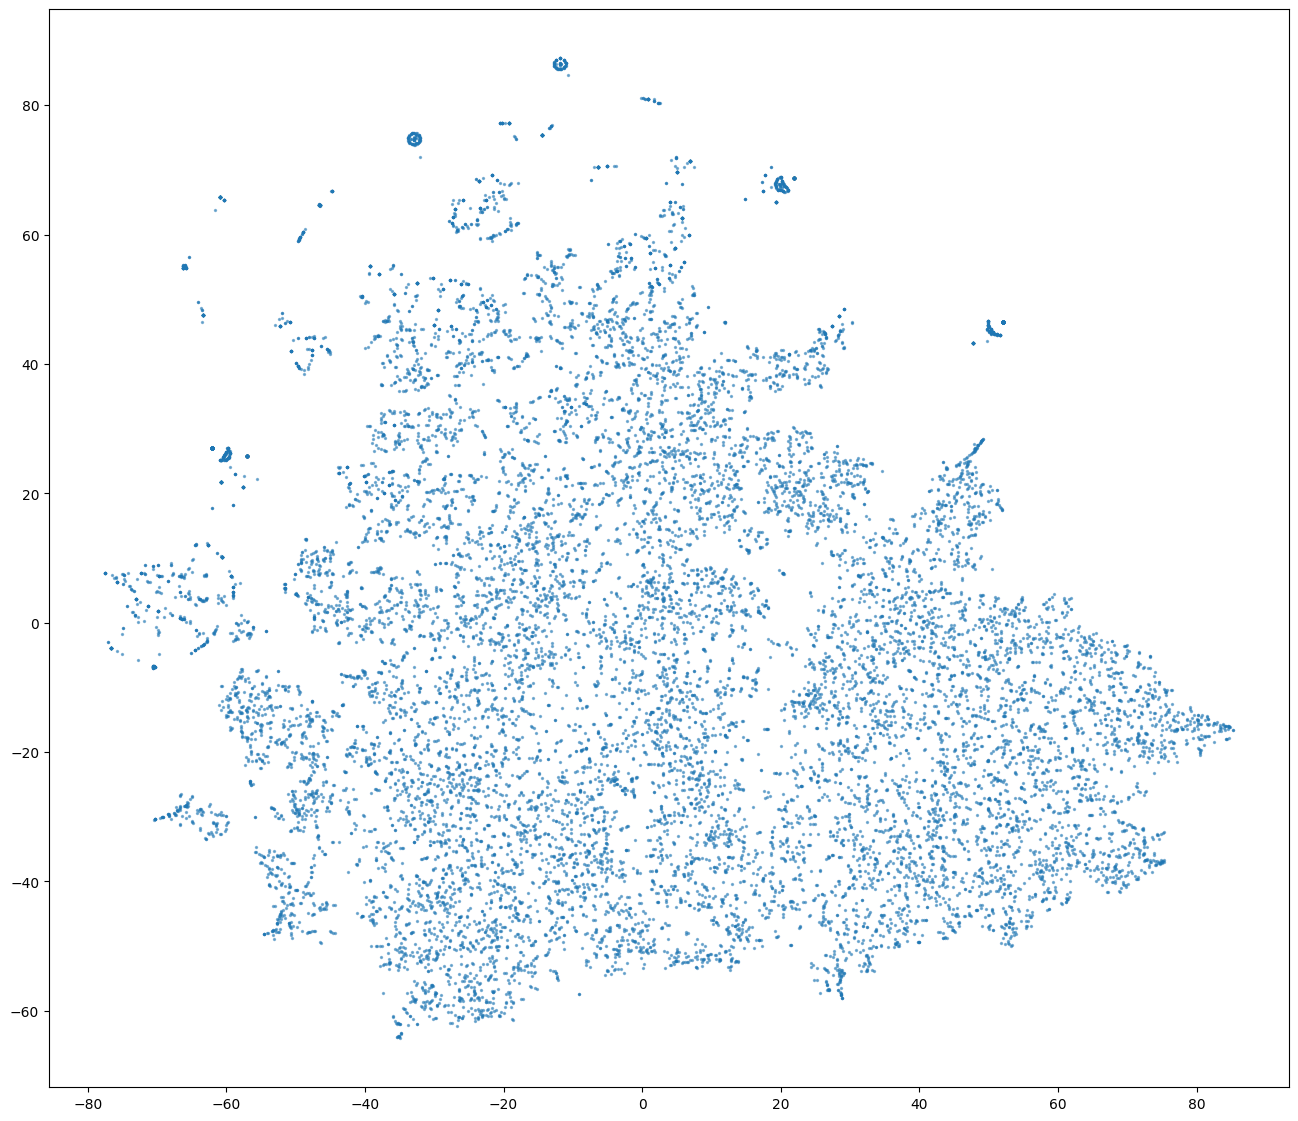

In [42]:
fig, ax = plt.subplots(figsize=(16,14))
plt.scatter(dfe.X, dfe.Y, s=2, alpha=0.5)

In order to visualize this dataset more fully, we can leverage the <a href="https://cvw.cac.cornell.edu/PyDataSci2/bokeh.aspx">interactive plotting functionality supported by Bokeh</a>, which we introduced earlier in this tutorial in the context of Twitter data.

By rendering different parts of the augmented dataframe in various ways, we can produce a map that fleshes out the picture above, providing insights into the differences between pitchers and position players, and between HOF inductees and those not in the HOF.  Bokeh produces an html file with all this information embedded, and by panning, zooming, and hovering over data points to see additional statistics, one can explore this map of hitting in baseball.

In [43]:
from bokeh.plotting import figure as figure2 
from bokeh.plotting import show, output_file
from bokeh.models import ColumnDataSource, HoverTool

colors = dfe.Pitcher.apply(lambda x: {True:'#3333dd', False: '#dd3333'}[x])
radii = 12*dfe.HOF + 3
status = list(zip(1*dfe.HOF, 1*dfe.Pitcher))
labelmap = {(0,0): 'Player', (0,1): 'Pitcher', (1,0): 'HOF Player', (1,1): 'HOF Pitcher'}
labels = list(map(lambda x: labelmap[x], status))

R = pl_bat_per_ab['R']
H = pl_bat_per_ab['H']
TwoB = pl_bat_per_ab['2B']
ThreeB = pl_bat_per_ab['3B']
HR = pl_bat_per_ab['HR']
RBI = pl_bat_per_ab['RBI']
SO = pl_bat_per_ab['SO']
BB = pl_bat_per_ab['BB']

source = ColumnDataSource(data=dict(
    x = dfe.X,
    y = dfe.Y,
    playerID = dfe.playerID,
    name = dfe.Name,
    radii = radii,
    hof = dfe.HOF,
    pitcher = dfe.Pitcher,
    color = colors,
    label = labels,
    R = R,
    H = H,
    TwoB = TwoB,
    ThreeB = ThreeB,
    HR = HR,
    RBI = RBI,
    SO = SO,
    BB = BB
))
    
TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,save"

p = figure2(tools=TOOLS, plot_width=1000, plot_height=1000)
scatter = p.scatter(source=source, x='x', y='y', size='radii', color='color', fill_alpha=0.50)
p.add_tools(HoverTool(tooltips=[('Name:', '@name'), ('HOF', '@hof'), 
                                ('R', '@R'), ('H', '@H'), ('2B', '@TwoB'), ('3B', '@ThreeB'),
                                   ('HR', '@HR'), ('SO', '@SO'), ('BB', '@BB')]))

output_file("/data/elastic-notebook/tmp/batting_TSNE.html", title='batting')
show(p)

### Exercise / Extra Credit

In the code above, where we have made an interactive plot with Bokeh, it would be nice to be able to produce a legend for the figure that indicates the status of each of the four marker types (small blue, small red, large blue, large red = Pitcher, Player, HOF Pitcher, HOF Player, respectively).  Despite trying to do so through various means (e.g., using the <code>legend_group</code> and <code>legend_field</code> options to <code>p.scatter</code>, and explicitly creating a Legend <a href="https://docs.bokeh.org/en/latest/docs/user_guide/annotations.html#legends">as described in the Bokeh documentation</a>), we have been unable to do so.  Any success in solving this puzzle would be appreciated.